---
# 01. Normal equation
---

In [1]:
import numpy as np 

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
# 모든 샘플에 x0 = 1을 추가합니다.
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

array([[3.88524134],
       [3.11786834]])

In [4]:
X_new = np.array([[0], [2]])
# 모든 샘플에 x0 = 1을 추가합니다.
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.88524134],
       [10.12097802]])

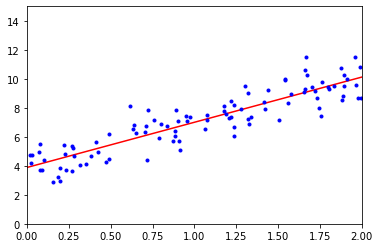

In [5]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

---
# 02. Linear Regression
---

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.88524134]), array([[3.11786834]]))

In [7]:
lin_reg.predict(X_new)

array([[ 3.88524134],
       [10.12097802]])

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.88524134],
       [3.11786834]])

In [9]:
np.linalg.pinv(X_b).dot(y)

array([[3.88524134],
       [3.11786834]])

In [10]:
eta = 0.1  # 학습률
n_iterations = 1000
m = 100

# 무작위 초기화
theta = np.random.randn(2, 1)  

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [11]:
theta

array([[3.88524134],
       [3.11786834]])

---
# 03. Stochastic Gradient Descent [SGD]
---

In [15]:
n_epochs = 50
t0, t1   = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

# 무작위 초기화
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta   = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [16]:
theta

array([[3.8815205 ],
       [3.17178559]])

In [17]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [18]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.87961574]), array([3.12144644]))

---
# 04. Polynomial Regression
---

In [19]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

In [21]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.26117812])

In [22]:
X_poly[0]

array([-0.26117812,  0.06821401])

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.92901224]), array([[1.03912813, 0.51821696]]))

---
# 05. Learning Curve
---

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict   = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="훈련 세트")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="검증 세트")

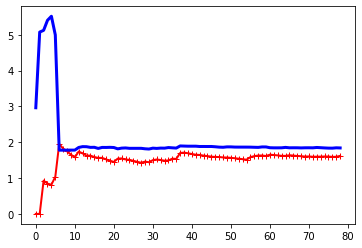

In [34]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)